# EE4211 Project - Question 2  Forecasting


Group number: Group No.21

Group members: Zhou Ying A0229575R, Wang Shi Cheng A0206245M, Hing Kai Jie A0190155J, Li Chunlin A0205460R

It will take some time to finish running.

And there will be some pre-experiments using singel data befor deriving the final results. Please kindly read the annotations.

## Question 2.1 
### 1.why want to forecast the gas consumption in the future?

#### (1) Energy Save.
Gas is a limited natural resource.
Hence predicting gas consumption will allow the gas suppliers companies to find out the trends in consumption so that they are able to foresee and accommodate for any increases in consumption in the future by preparing extra inventory beforehand and allow relevant government authorities to know when it may be necessary to promote the reduce in consumption for fear of exhausting this natural resource or to invest more in alternative energy sources.

#### (2) Contingency Plan

It allows the gas companies to purchase from gas suppliers in bulk in preparation of possible periods of increase in consumption, reducing the purchase price, cost of transporting gas, storage fee, etc.

#### (3) Trending and Policy
Since it refers to the forecast's current consumption pattern, if the actual data deviates from the estimates by a certain percentage in the future. It would be easier to identify and investigate the reason for the deviation between actual and forecasted consumption. i.e. Shift in Governmental policies to promote environmentally friendly alternative energy sources, unexpectedly colder winters resulting in people using their heaters more frequently.

#### (4) Security 
Abnormal data can help gas company to prevent and detect if there is any gas leakage during the transporting.

### Who would find this information valuable?

1. Customers: For those households that would be interested in monitoring their own consumption so that they can make relevant adjustments in their lifestyles.
2. Government: Relevant government authorities so that they can adjust their inflation for public utilities costs for their next white paper budget report or so that they can make changes to their country’s energy policies.  
3. Environmental activists: Useful information that can be used to try to convince governments to invest in alternative environmentally friendly energy sources.
4. Gas companies: So that they are able to predict and prepare for any consumer increase in gas consumption.
5. Gas production countries: Countries that export their natural gas to other countries can use this information to adjust their prices.



### What can you do if you have a good forecasting model?

With a good forecasting model, we could 

1. Sell the forecasting model to other gas companies.
2. The model can then be used to predict the gas consumption trends of other regions around America.
3. The model can be used in comparing the gas consumption trends of various countries, and then the possible effects on environmental issues like global warming in the future can be studied upon.


## Question 2.2 - Linear Regression Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
data = pd.read_csv("/Users/zhouying/Desktop/dataport-export_gas_oct2015-mar2016.csv")
df = pd.DataFrame(data)

In [3]:
#change to datetime format
df['localminute'] = df['localminute'].map(lambda x: str(x)[0:-3])
df['localminute'] = pd.to_datetime(df['localminute'], infer_datetime_format=True)

In [4]:
def select_monthdata(df, month, meter_id):
    df_month = df[df.localminute.dt.month.isin([month])]
    grouped = df_month.groupby('dataid')
    data1 = grouped.get_group(meter_id)
    hourly_value_list = []
    month_dict = {1:31,2:28,3:31,4:30,5:31,6:30,7:31,8:31,9:30,10:31,11:30,12:31} 
    #create a month dictionary and support that how many days in each month
    
    for d in np.arange(1, month_dict[month] + 1):
        #loop through each day in the list
        day_data = data1[data1.localminute.dt.day.isin ([d])]
        for h in range(0,24):
        #loop through each hour in the list
            hourly_data = day_data[day_data.localminute.dt.hour.isin ([h])]
            value = list(hourly_data.meter_value[-1:])
            hourly_value_list.append(value)
    hourly_data = pd.DataFrame(hourly_value_list,columns = ['value'])
    hourly_data = hourly_data.fillna(method = 'ffill')    #fill the vacant with the previous data.
    hourly_data = hourly_data.fillna(method = 'bfill')    #fill the vacant with its following data.
    return hourly_data

In [5]:
# group the data
grouped = df.groupby('dataid')

In [6]:
key = 35 # select the meter_id you want to analyse and make a predict.

In [7]:
# get the actual month list of the selected meter(for some meters they didnt have a 6-month recording)
gpdata = grouped.get_group(key)
group_month = gpdata.groupby(df.localminute.dt.month)
month_list = []
for name,group in group_month:
    if name < 10:       # after 'groupby' the return data will be sorted and changed their orginal order.  
        name += 12      # the month in year 2016 will +12 to keep the order.
    month_list.append(name)
month_list_sort = list(np.sort(month_list))

In [8]:
month_list = []
for i in month_list_sort:
    if i > 12:
        i -= 12
    month_list.append(i)

In [9]:
month_list

[10, 11, 12, 1, 2, 3]

In [10]:
def get_hourly_data(meter_id):
    
    hourly_data = pd.DataFrame()
    d_month = pd.DataFrame()
    
    for month in month_list:
        d = select_monthdata(df, month, meter_id)
        d_month = pd.concat([d_month,d],axis = 0)
    hourly_data = pd.concat([hourly_data,d_month], axis=1)
    
    return hourly_data

In [11]:
hourly_data = get_hourly_data(key) # get hourly data of the selected meter.

#### In this way, we can get the hourly readings of some 'malfunctioning meters(no readings for at least one-month time)' in Q1 and get their correlative five houses.

In [12]:
hourly_data.columns

Index(['value'], dtype='object')

In [13]:
y = hourly_data['value'].values
x = np.arange(len(y))
x = x.reshape(-1, 1)

In [14]:
y

array([ 93470.,  93470.,  93470., ..., 104684., 104690., 104692.])

In [15]:
# create linear regression object
lr = linear_model.LinearRegression()

# train the model using the training sets
lr.fit(x, y)

# make predictions using the testing set
y_pred = lr.predict(x)

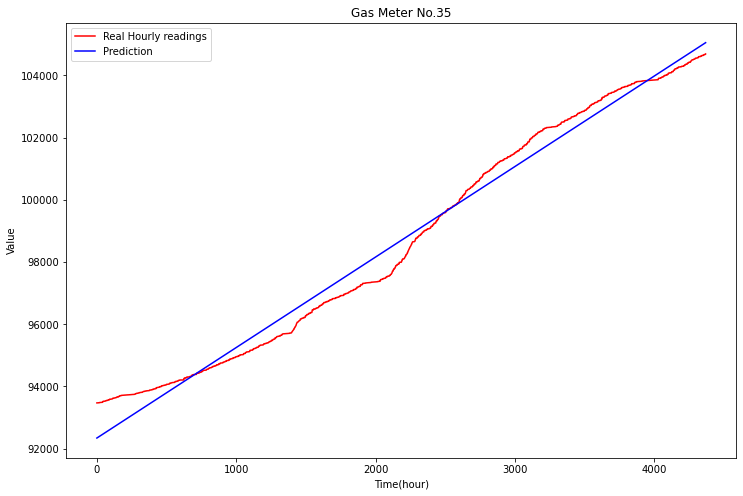

In [16]:
fig = plt.figure(figsize=(12,8)) # set the figure size
# plot 
plt.plot(x,y,'-r', label = 'Real Hourly readings')
plt.plot(x,y_pred,'-b', label = 'Prediction')
plt.xlabel('Time(hour)')
plt.ylabel('Value')
plt.title('Gas Meter No.'+ str(key))
plt.legend()
plt.show()

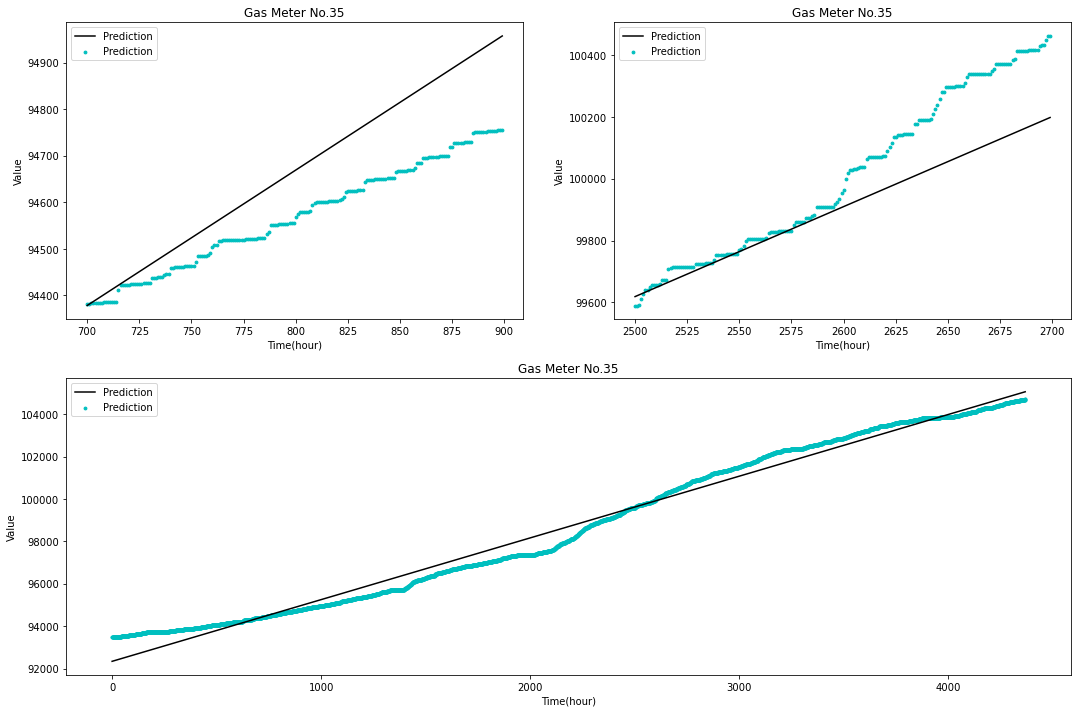

In [17]:
fig = plt.figure(figsize=(18,12))
# plot scatter
# actually, it is too neat to plot all the data, so we select some parts

plt.subplot(221)
# plot scatter
period1 = np.arange(700,900) # set the period 
plt.scatter(x[period1],y[period1],label = 'Prediction',marker = 'o',color = 'c', s = 8)
plt.plot(x[period1],y_pred[period1],'-k', label = 'Prediction')
plt.xlabel('Time(hour)')
plt.ylabel('Value')
plt.title('Gas Meter No.'+ str(key))
plt.legend()

plt.subplot(222)
period2 = np.arange(2500,2700)
plt.scatter(x[period2],y[period2],label = 'Prediction',marker = 'o',color = 'c', s = 8)
plt.plot(x[period2],y_pred[period2],'-k', label = 'Prediction')
plt.xlabel('Time(hour)')
plt.ylabel('Value')
plt.title('Gas Meter No.'+ str(key))
plt.legend()


plt.subplot(212)
plt.scatter(x,y,label = 'Prediction',marker = 'o',color = 'c', s = 8)
plt.plot(x,y_pred,'-k', label = 'Prediction')
plt.xlabel('Time(hour)')
plt.ylabel('Value')
plt.title('Gas Meter No.'+ str(key))
plt.legend()
plt.show()

In [18]:
MAE_list = []
MSE_list = []
r2_list = []

MAE_list.append(mean_absolute_error(y, y_pred))
MSE_list.append(mean_squared_error(y, y_pred))
r2_list.append(r2_score(y, y_pred))

print('Coefficients:',lr.coef_)
# the mean absolute error
print('mean_absolute_error: %.2f'
      % mean_absolute_error(y, y_pred))
# the mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred))
# the coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, y_pred))


Coefficients: [2.91148583]
mean_absolute_error: 399.60
Mean squared error: 213397.35
Coefficient of determination: 0.98


The coefficien shows the average hourly gas usage. in this case, it says the average hourly gas usage of this family is 4.63 m^3 

Mean Absolute Error (MAE) is used to evaluate the degree of closeness between the predicted results and the real data set, and the smaller the value, the better the fitting effect.

Mean Squared Error (MSE), is the mean of the sum of squares of the errors between the predicting data and the original data, and the smaller the value is, the better the fitting effect is.

The coefficient of determination: 1 is perfect prediction. The closer the value is to 1, the more 'x' can explain the variance change of y, and the smaller the value is, the worse the effect is.

## Question 2.3 - Support Vector Regression Model

In [19]:
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

In [20]:
svr = make_pipeline(RobustScaler(), SVR(C=1000.0, epsilon=0.2))  

# Use RobustScaler to Scale features using statistics that are robust to outliers.
# outliers can often influence the sample mean / variance in a negative way. 
# In such cases, the median and the interquartile range often give better results.

svr.fit(x, y)
y_pred = svr.predict(x)

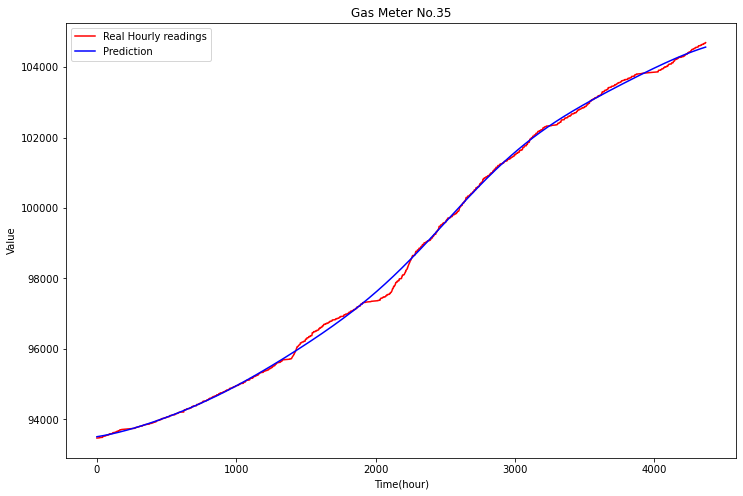

In [21]:
fig = plt.figure(figsize=(12,8))

plt.plot(x,y,'-r', label = 'Real Hourly readings')
plt.plot(x,y_pred,'-b', label = 'Prediction')
plt.xlabel('Time(hour)')
plt.ylabel('Value')
plt.title('Gas Meter No.'+ str(key))
plt.legend()
plt.show()

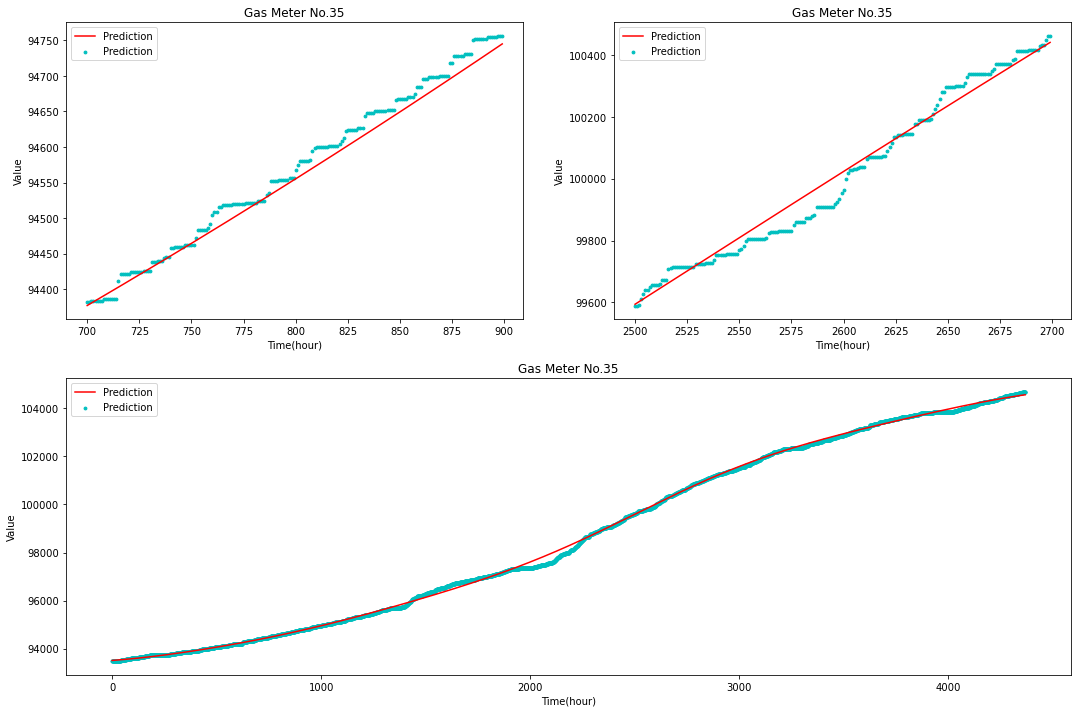

In [22]:
fig = plt.figure(figsize=(18,12))
# plot scatter

plt.subplot(221)
# plot scatter
period1 = np.arange(700,900) # set the period 
plt.scatter(x[period1],y[period1],label = 'Prediction',marker = 'o',color = 'c', s = 8)
plt.plot(x[period1],y_pred[period1],'-r', label = 'Prediction')
plt.xlabel('Time(hour)')
plt.ylabel('Value')
plt.title('Gas Meter No.'+ str(key))
plt.legend()

plt.subplot(222)
period2 = np.arange(2500,2700)
plt.scatter(x[period2],y[period2],label = 'Prediction',marker = 'o',color = 'c', s = 8)
plt.plot(x[period2],y_pred[period2],'-r', label = 'Prediction')
plt.xlabel('Time(hour)')
plt.ylabel('Value')
plt.title('Gas Meter No.'+ str(key))
plt.legend()


plt.subplot(212)
plt.scatter(x,y,label = 'Prediction',marker = 'o',color = 'c', s = 8)
plt.plot(x,y_pred,'-r', label = 'Prediction')
plt.xlabel('Time(hour)')
plt.ylabel('Value')
plt.title('Gas Meter No.'+ str(key))
plt.legend()
plt.show()

In [23]:
MAE_list.append(mean_absolute_error(y, y_pred))
MSE_list.append(mean_squared_error(y, y_pred))
r2_list.append(r2_score(y, y_pred))

# the mean squared error
print('Mean squared error: %.2f'  % mean_squared_error(y, y_pred))
# mean_absolute_error
print('mean_absolute_error: %.2f' % mean_absolute_error(y, y_pred))
# the coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y, y_pred))

Mean squared error: 9504.26
mean_absolute_error: 64.23
Coefficient of determination: 1.00


## Comparison 

In [24]:
from sklearn.model_selection import cross_val_score

# K-fold cross validation
n_folds = 5
socre_lr = cross_val_score(lr, x, y, cv = n_folds) 
socre_svr = cross_val_score(svr, x, y, cv = n_folds) 

In [25]:
print('LR:',socre_lr)
print('SVR',socre_svr)

LR: [-9.24860083  0.18082315  0.60600828  0.37575592  0.65755533]
SVR [-43.64756134   0.96385007   0.85047285   0.97474003  -7.8291855 ]


In [26]:
pd.DataFrame({'Mean Absolute Error':MAE_list,
                      'Mean Squared Error':MSE_list,
                      'Coefficient of determination':r2_list},
            index = ['LR','SVR'])

,Mean Absolute Error,Mean Squared Error,Coefficient of determination
LR,399.598776,213397.351793,0.984413
SVR,64.232407,9504.263430,0.999306


### So, we think the Forecasting model of SVR is much better.